In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Data

In [5]:
d1 = np.loadtxt('outlier_1d.txt')
d1

array([21.345, 20.2  , 14.346, ..., 16.769, 23.633, 21.388])

In [6]:
d2 = np.loadtxt('outlier_2d.txt')
d2

array([[12.486, 19.387],
       [ 8.184, 23.854],
       [12.195, 14.544],
       ...,
       [ 8.06 , 20.962],
       [ 8.805, 17.617],
       [ 9.798, 16.666]])

In [8]:
d3 = np.loadtxt('outlier_curve.txt')
d3

array([[ 0.   ,  1.415],
       [ 0.01 ,  2.666],
       [ 0.02 ,  2.377],
       ...,
       [ 9.98 ,  4.116],
       [ 9.99 ,  4.8  ],
       [10.   ,  6.223]])

#### 2. Outliers - sklearn i metoda z poradnika

#### - d1 sklearn

In [46]:
d1
print(d1)
print(f"Len d1: {len(d1)}")
print(f"Len d1: {len(d2)}")

[21.345 20.2   14.346 ... 16.769 23.633 21.388]
Len d1: 1010
Len d1: 1010


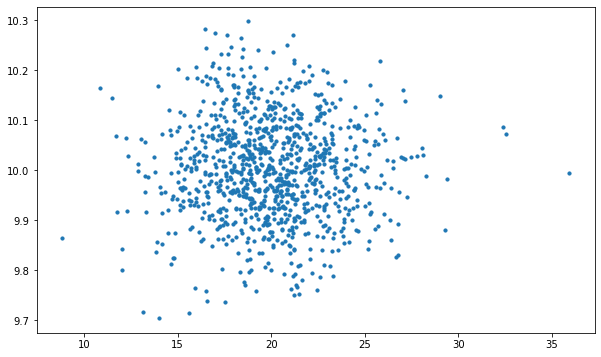

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(d1, np.random.normal(10,0.1,size=d1.size),s=10);

In [9]:
from sklearn.neighbors import LocalOutlierFactor

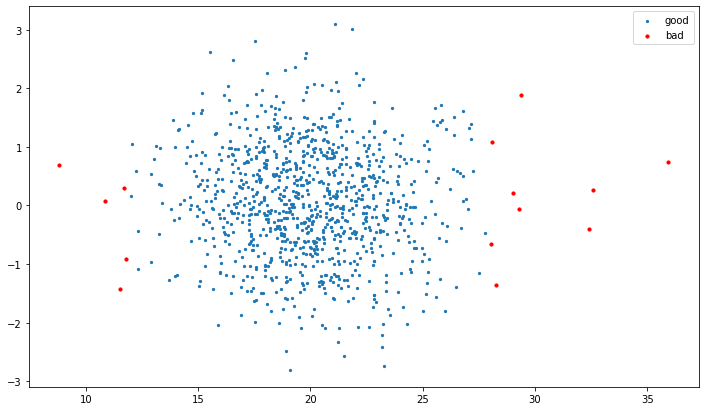

In [170]:
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
good = lof.fit_predict(d1.reshape(len(d1),-1)) == 1

visual_scatter = np.random.normal(size=d1.size)

plt.figure(figsize=(12,7))
plt.scatter(d1[good], visual_scatter[good], s=5, label='good')
plt.scatter(d1[~good], visual_scatter[~good], s=10, color='red', label='bad')
plt.legend()
plt.show();

In [169]:
# outliers
len(d1[~good])


# good data

len(d1[good])

996

#### - d1 poradnik

In [83]:
df1 = pd.DataFrame(data = {'d1':d1})

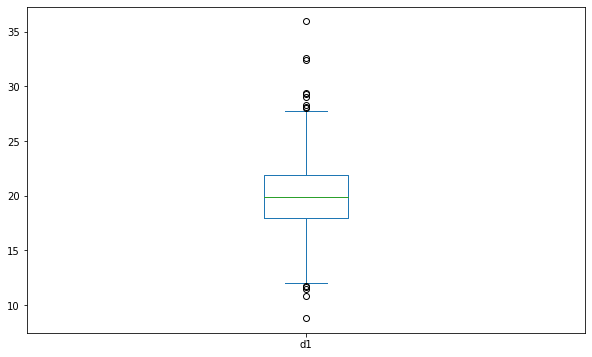

In [87]:
df1.plot(kind='box', figsize=(10,6));

In [142]:
# obliczanie kwantyli i różnicy między kwantylowej
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)
iqr = q3[0]-q1[0]

In [171]:
# granica górna i dolna

low_boundary=(q1[0]-1.5*iqr)

upp_boundary=(q3[0]+1.5*iqr)

In [134]:
print (f'Q1: {q1[0]}')
print (f'Q3: {q3[0]}')
print (f'IQR: {iqr[0]}')
print (f'Low boundary: {low_boundary[0]}')
print (f'Upp boundary: {upp_boundary[0]}')

Q1: 17.918
Q3: 21.87225
IQR: 3.954250000000002
Low boundary: 11.986624999999997
Upp boundary: 27.803625000000004


In [135]:
num_of_outliers_L = (df1[iqr.index]<low_boundary).sum()
num_of_outliers_U = (df1[iqr.index]>upp_boundary).sum()

print (f'Number of low_boundary outliers: {num_of_outliers_L}')
print (f'Number of upp_boundary outliers: {num_of_outliers_U}')

Number of low_boundary outliers: d1    5
dtype: int64
Number of upp_boundary outliers: d1    9
dtype: int64


In [136]:
outliers = pd.DataFrame({'low_boundary':low_boundary,'upp_boundary':upp_boundary,'num_of_outliers_L':num_of_outliers_L,
                         'num_of_outliers_U':num_of_outliers_U})

outliers

,low_boundary,upp_boundary,num_of_outliers_L,num_of_outliers_U
d1,11.986625,27.803625,5,9


In [147]:
df1[(df1['d1'] < upp_boundary) & (df1['d1'] > low_boundary)]

,d1
0,21.345
1,20.200
2,14.346
3,15.251
4,20.719
...,...
1005,22.490
1006,24.482
1007,16.769
1008,23.633


In [151]:
len(d1[(d1 > low_boundary) & (d1 < upp_boundary)])

996